# Regresión lineal

En el mercado de smartphones, los dispositivos con mayor capacidad de almacenamiento suelen tener baterías mas duraderas. Modelar estos datos podría ayudar a estimar la duración de batería en función de su capacidad de almacenamiento, algo útil para los consumidores a la hora de elegir un nuevo disposivo. Sea X la capacidad de almacenamiento de los smartphones (en TB) e Y la duración de su batería en días, con densidad de probabilidad conjunta de la forma:



$$p_{xy}(x,y) = \frac{3}{4} \cdot 𝟙{[0 \leq y \leq 1 + x^2,   0 \leq x \leq 1]}$$

### Librerias

Para realizar este trabajo práctico, se utilizaron las siguientes librerias:

In [2237]:
import numpy as np
import pandas as pd
from time import time 
import matplotlib.pyplot as plt
from numpy.random import rand

### Gráfico del soporte de la densidad conjunta

Para tener un primer acercamiento al problema, se decidió graficar el soporte de la densidad conjunta.

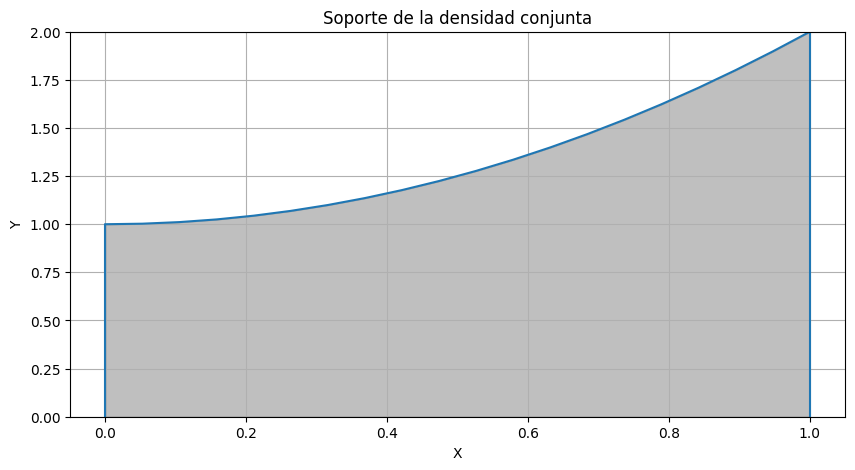

In [2238]:
X = np.linspace(0, 1, 20)

Y = 1 + X**2

plt.figure(figsize = (10, 5))
plt.plot(X, Y)
plt.grid(True)
plt.ylim(0, 2)
plt.vlines(x = 0, ymin = 0, ymax = min(Y))
plt.vlines(x = 1, ymin = 0, ymax = max(Y))
plt.title('Soporte de la densidad conjunta')
plt.fill_between(X, Y, color = 'gray', alpha = 0.5)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

## Búsqueda de la esperanza condicional

### Cálculo de la Función de Probabilidad de X

Sabemos que la funcion de densidad dada se puede calcular como:

$P_{XY}(x,y) = P_X(x) \cdot P(Y|X) $

Como la función de Probabilidad $P(Y|X)$ calcula la probabilidad de Y en base a un valor de X ya dado, sigue una distribucion uniforme entre 0 y la cota superior delimitada por la curva $1 + x^2$. Entonces, la funcion de probabilidad obtenida es la siguiente:

$$P(Y|X) = \frac{1}{1+x^2}𝟙{[0 \leq y \leq 1 + x^2]}.$$



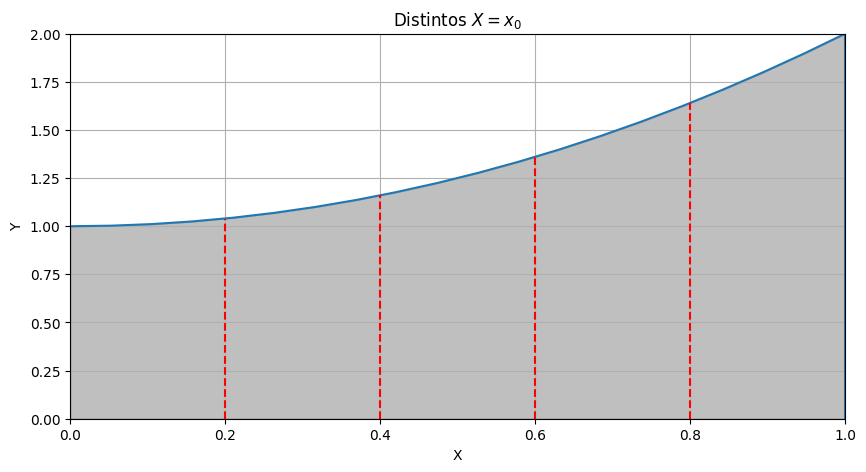

In [2239]:
plt.figure(figsize = (10, 5))
plt.plot(X, Y)
plt.grid(True)
plt.ylim(0, 2)
plt.xlim(0, 1)
plt.vlines(x = 0, ymin = 0, ymax = min(Y))
plt.vlines(x = 1, ymin = 0, ymax = max(Y))
plt.title('Distintos $X = x_0$')
plt.fill_between(X, Y, color = 'gray', alpha = 0.5)
plt.vlines(x = 0.2, ymin = 0, ymax = 1+0.2**2, color = 'red', linestyle = '--')
plt.vlines(x = 0.4, ymin = 0, ymax = 1+0.4**2, color = 'red', linestyle = '--')
plt.vlines(x = 0.6, ymin = 0, ymax = 1+0.6**2, color = 'red', linestyle = '--')
plt.vlines(x = 0.8, ymin = 0, ymax = 1+0.8**2, color = 'red', linestyle = '--')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

Luego, la esperanza de una uniforme es su intervalo dividido 2:

$$ E[Y|X] = \frac{1+x^2}{2}. $$



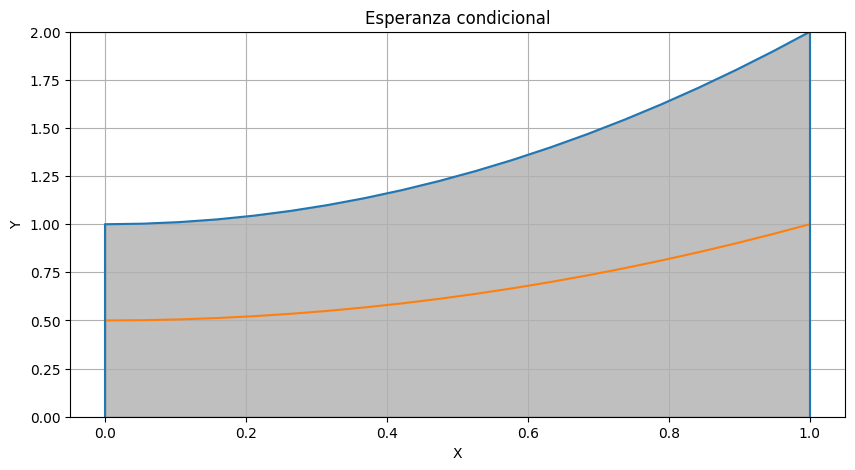

In [2240]:
Yhat = (1 + X**2)/2

plt.figure(figsize = (10, 5))
plt.plot(X, Y)
plt.plot(X, Yhat)
plt.grid(True)
plt.ylim(0, 2)
plt.vlines(x = 0, ymin = 0, ymax = min(Y))
plt.vlines(x = 1, ymin = 0, ymax = max(Y))
plt.title('Esperanza condicional')
plt.fill_between(X, Y, color = 'gray', alpha = 0.5)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

Luego, se procedió a calcular el error bayesiano, el cual se define como 
$$ E[Var(Y|X)], $$

Sabiendo que Y|X sigue una distribucion uniforme, la varianza de una uniforme se calcula como

$$ Var(U) = \frac{(b-a)^2}{12}, $$

entonces,

$$ Var(Y|X) = \frac{(1+x^2)^2} {12}. $$

Luego, se calculó la esperanza de la varianza anteriormente calculada:

$$ E[Var(Y|X)] = E[\frac{(1+x^2)^2} {12}] = \frac{1}{12} \cdot E[1 + 2x^2 + x^4].$$

Los momentos de orden K de X se calculan como

$$E[X^k] =  \int_{0}^{1} X^k \cdot \frac{3}{4} \cdot (1+X^2) \cdot  dX = \frac{3}{4}\cdot(\frac{1}{k+1}+\frac{1}{k+3}).$$


In [2241]:
k_lista = [1,2,3,4]
esperanzas = []

for k in k_lista:
    resultado = (3/4) * ((1/(k+1)) + (1/(k+3)))
    esperanzas.append(resultado)

error_bayesiano = (1/12) * (1 + 2*esperanzas[1] + esperanzas[3])
error_bayesiano



0.1714285714285714

Finalmente, el error bayesiano: 

$$ E[Var(Y|X)] \approx 0.171 $$

### Regresion lineal

Se propone un estimador de la forma

$$ \hat{Y} = aX+b, $$

el cual en este caso se utilizó el Estimador Lineal de Menor Error Cuadratico Medio (LMMSE):

$$\hat{Y}= \frac{Cov(X,Y)}{\sigma _X^2} \cdot (X - \mu _x) + \mu_y.$$

Tenemos que:

$$ \sigma_X^2 = E[X^2] - E^2[X] = 0.0836. $$



In [2242]:
var_X = esperanzas[1] - esperanzas[0]**2 
var_X

0.08359375000000002

Luego, sabiendo que
$$ Cov(X,Y) = E[(X-\mu_x)\cdot(Y-\mu_y)] = E[XY] - E[Y] \cdot E[X], $$

se calculó primero la $E[Y]$ con la siguiente propiedad:

$$ E[Y] = E[E[Y|X]] $$
$$ E[Y] = E[\frac{1+X^2}{2}] $$ 
$$ E[Y] = \frac{1}{2} + \frac{1}{2}\cdot E[X^2] $$
$$ E[Y] = \frac{1}{2} + \frac{1}{2}\cdot \int_{0}^{1} X^k \cdot \frac{3}{4} \cdot (1+X^2) \cdot  dX $$

In [2243]:
# Calcular E[Y]
E_X2 = esperanzas[1]  # E[X^2] ya calculado
E_Y = 0.5 + 0.5 * E_X2
E_Y


0.7

Luego, se procedió a calcular $E[XY]$:

$$ E[XY] = E[XE[Y|X]] = E[\frac{X+X^3}{2}] = \frac{1}{2}\cdot (E[X]+E[X^3]) $$

In [2244]:
# Calcular E[X] y E[X^3]
E_X = (3/4) * ((1/(1+1)) + (1/(1+3)))
E_X3 = (3/4) * ((1/(3+1)) + (1/(3+3)))

# Calcular E[XY]
E_XY = 0.5 * (E_X + E_X3)
E_XY

0.4375

In [2245]:
E_XY - E_X * E_Y


0.04375000000000001

Por lo tanto, la covarianza obtenida fue:

$$ Cov(X,Y) \approx 0.044, $$ 

otorgando el siguiente estimador:

$$ \hat{Y} = \frac{0.044}{0.0836} * (X - 0.5625) + 0.7 $$

$$ \hat{Y} \approx 0.5233X+0.4056 $$



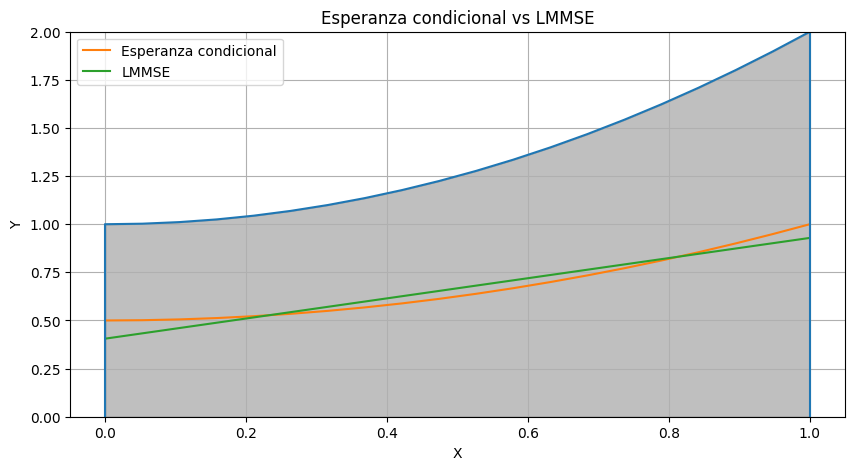

In [2246]:
Ylmmse = 0.5233*X + 0.4056

plt.figure(figsize = (10, 5))
plt.plot(X, Y)
plt.plot(X, Yhat, label = 'Esperanza condicional')
plt.plot(X, Ylmmse, label = 'LMMSE')
plt.legend();
plt.grid(True)
plt.ylim(0, 2)
plt.vlines(x = 0, ymin = 0, ymax = min(Y))
plt.vlines(x = 1, ymin = 0, ymax = max(Y))
plt.title('Esperanza condicional vs LMMSE')
plt.fill_between(X, Y, color = 'gray', alpha = 0.5)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

## Generación de datasets

Para la simulación de muestras de X se utilizó la funcion `np.random.uniform` para simular 500 muestras aleatorias entre 0 y 1. 

In [2247]:
muestrasX = np.random.uniform(0, 1, 500).reshape(1, 500)

Para la simulación de muestras de Y se añade un grado de complejidad ya que las muestras no deben sobrepasar el valor $1+x^2$, entonces se generan muestras entre 0 y 2 que es el valor maximo de $1+x^2$ y se crea un contador para ir agregando al vector `muestrasY` las muestras que cumplen la condicion requerida.

In [2248]:
muestrasY = np.array([]).reshape(0, 1)

contadorY = 0

while contadorY < 500:
    auxiliar = np.random.uniform(0, 2)
    if auxiliar < 1 + muestrasX[0, contadorY]**2:
        muestrasY = np.append(muestrasY, auxiliar).reshape(-1, 1)
        contadorY += 1

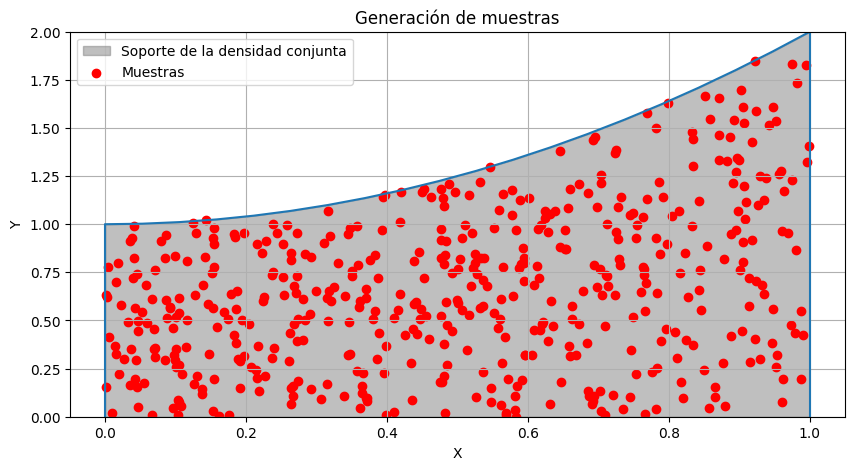

In [2249]:
plt.figure(figsize = (10, 5))
plt.plot(X, Y)
plt.grid(True)
plt.ylim(0, 2)
plt.vlines(x = 0, ymin = 0, ymax = min(Y))
plt.vlines(x = 1, ymin = 0, ymax = max(Y))
plt.title('Generación de muestras')
plt.fill_between(X, Y, color = 'gray', alpha = 0.5, label = 'Soporte de la densidad conjunta')
plt.xlabel('X')
plt.ylabel('Y')
plt.scatter(muestrasX, muestrasY.T, color = 'red', label = 'Muestras')
plt.legend();
plt.show()

# Regresion Lineal Matricial

Para reducir la complejidad de la esperanza condicional, se utilizó un estimador lineal de la forma

$$ \hat{Y} = w^T \cdot X + b. $$

Para encontrar un estimador optimo en forma matricial se puede expresar el problema como

$$ (w,b) \in arg \min_\textbf{w} ||\textbf{X}\cdot \textbf{w} - \textbf{y}||^2,$$ 

siendo

$\textbf{X} =
 \begin{pmatrix}
  1 & X^T_1 \\
  1 & X^T_2 \\
  \vdots  & \vdots   \\
  1 & X^T_n
 \end{pmatrix}$,

$\textbf{y} =
  \begin{pmatrix}
  y_1 \\
  y_2 \\
  \vdots  \\
  y_n
 \end{pmatrix}$,

$\textbf{w} = 
 \begin{pmatrix}
 b \\
 w
 \end{pmatrix}$.


Al desarrollar $J(\textbf{w})$ obtenemos la siguiente expresion:

$$ J(\textbf{w})  = \frac{1}{n} \textbf{w}^T  \textbf{X}^T  \textbf{X}  \textbf{w} - 2  \textbf{y}^T \textbf{X}  \textbf{w} + \textbf{y}^T  \textbf{y}, $$

y al derivar se obtuvo la siguiente expresion:

$$ \nabla J(\textbf{w}) = \frac{1}{n} (2 \textbf{X}^T \textbf{X} \textbf{w} - 2\textbf{X}^T \textbf{y}),$$

y al derivar otra vez se consigue el hessiano el cual es

$$ \textbf{H}(\textbf{w}) = \frac{2}{n}(\textbf{X}^T \textbf{X}). $$

Vemos que el problema es convexo y el gradiente de $J(\textbf{w})$ tiene un minimo global que minimiza la funcion coste.

Al igualar $ \nabla J(\textbf{w}) $ a 0 obtenemos 

$$ 2 \textbf{X}^T \textbf{X} \textbf{W} = 2 \textbf{X}^T \textbf{y} $$

$$ \textbf{w} = (\textbf{X}^T \textbf{X})^{-1} \textbf{X}^T \textbf{y}





In [2250]:
class regresion_lineal:
    def __init__(self):
        self.w = np.zeros((2,1))

    def fit(self, X, Y):
        n = len(X.T)
        X_entrenamiento = np.hstack((np.ones((n, 1)), X.T))
        self.w = np.linalg.inv(X_entrenamiento.T @ X_entrenamiento) @ X_entrenamiento.T @ Y
        return self.w

    def predict(self, X):
        n = len(X.T)
        X_prediccion = np.hstack((np.ones((n, 1)), X.T))
        return X_prediccion @ self.w
    
    def reglin_b(self):
        return self.w[0]
    def reglin_w(self):
        return self.w[1]
    
regresion_lineal = regresion_lineal()
regresion_lineal.fit(muestrasX, muestrasY)
regresor = regresion_lineal.predict(muestrasX)

In [2251]:
w_1 = regresion_lineal.reglin_w()
b_1 = regresion_lineal.reglin_b()

print("w es igual a:")
print(w_1)
print("b es igual a:")
print(b_1)

w es igual a:
[0.50872389]
b es igual a:
[0.40698892]


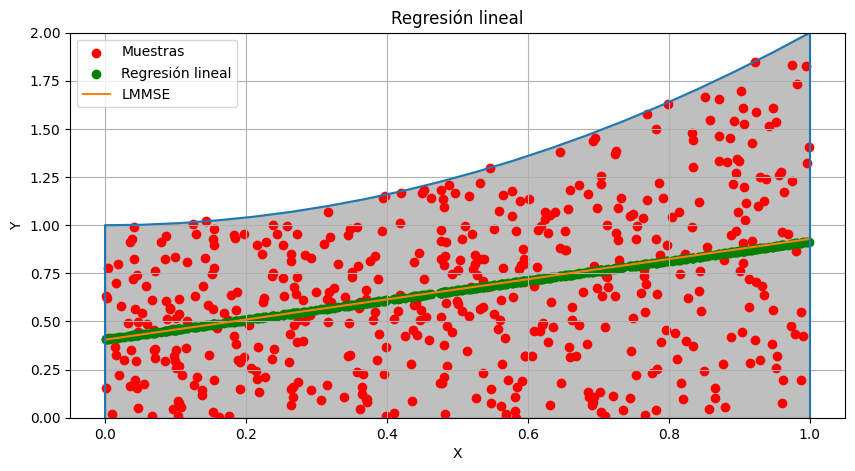

In [2252]:
plt.figure(figsize = (10, 5))
plt.plot(X, Y)
plt.grid(True)
plt.ylim(0, 2)
plt.fill_between(X, Y, color = 'gray', alpha = 0.5)
plt.scatter(muestrasX, muestrasY.T, color = 'red', label = 'Muestras')
plt.scatter(muestrasX, regresor.T, color = 'green', label = 'Regresión lineal')
plt.plot(X, Ylmmse, label = 'LMMSE')
plt.vlines(x = 0, ymin = 0, ymax = min(Y))
plt.vlines(x = 1, ymin = 0, ymax = max(Y))
plt.title('Regresión lineal')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

### Prediccion de bateria de 256 GB


In [2253]:
bateria_256 = np.array([[0.256]])

regresor_256 = regresion_lineal.predict(bateria_256)
regresor_256
print(f"La predicción de la duracion de la batería en dias de un smartphone con capacidad de 256 GB es de aproximadamente: {regresor_256[0][0]:.2f}")

La predicción de la duracion de la batería en dias de un smartphone con capacidad de 256 GB es de aproximadamente: 0.54


# Gradient descent

Para solucionar el problema de realizar la inversa de $(\textbf{X}^T \textbf{X})$ para encontrar el \textbf{w} que minimiza la funcion coste, se itera hasta conseguir el valor minimo del gradiente de J de la siguiente forma:

$$ \textbf{w}_{t+1} = \textbf{w}_t - \alpha * \nabla J(\textbf{w}_t).$$

De la sección anterior sabemos que

$$ \nabla J(\textbf{w}) = \frac{1}{n} (2 \textbf{X}^T \textbf{X} \textbf{w} - 2\textbf{X}^T \textbf{y}),$$

por lo que para el algoritmo nos hace falta encontrar al alpha optimo.

Podemos reescribir el gradiente de $ \nabla J(\textbf{w}) $ como

$$ \nabla J(\textbf{w}_t) = \nabla J(\textbf{w}^*) + H(\tilde{\textbf{w}})(\textbf{w}_t - \textbf{w}^*),$$

para algun $ \tilde{\textbf{w}} $ en el segmento que une a $\textbf{w}_t $ y a $\textbf{w}^* $, siendo $\textbf{w}^*$ el que cumple que $\nabla J(\textbf{w}^*) = 0$.

Luego, como $H$ es una matriz real, cuadrada y simetrica, la reescribo como $ Q^T \Lambda Q$, siendo $\Lambda$ la matriz diagonal con los autovalores de $H$ y $Q$ la matriz de autovectores de $H$.

De la primera ecuacion podemos restar a ambos miembros $\textbf{w}^*$ quedando

$$ \textbf{w}_{t+1} - \textbf{w}^* = \textbf{w}_t - \textbf{w}^* - \alpha \nabla J(\textbf{w}_t) $$

$$ \textbf{w}_{t+1} - \textbf{w}^* = (I - \alpha Q^T \Lambda Q)(\textbf{w}_t - \textbf{w}^*) $$

$$ \textbf{w}_{t+1} - \textbf{w}^* = Q^T(I - \alpha \Lambda)Q(\textbf{w}_t - \textbf{w}^*) $$

Al definir $v_t = Q(\textbf{w}_t - \textbf{w}*)$ y $v_{t+1} = Q(\textbf{w}_{t+1} - \textbf{w}^*)$, obtenemos la siguiente expresion:

$$ v_{t+1} = (I - \alpha \Lambda)v_t,$$

entonces

$$v_t = (I - \alpha \Lambda)^tv_0.$$

Como en cada componente tenemos $(1 - \alpha \lambda_j)^t$, estos terminos solo convergen si y solo si $|1-\alpha \lambda _j|$ son menores a 1.










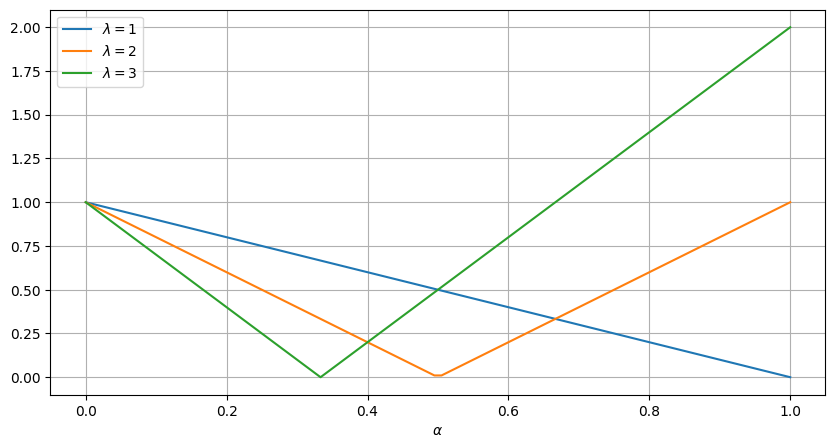

In [2259]:
alpha = np.linspace(0, 1, 100)

lambda1 = 1
lambda2 = 2
lambda3 = 3

salida1 = np.abs(1-alpha*lambda1)
salida2 = np.abs(1-alpha*lambda2)
salida3 = np.abs(1-alpha*lambda3)

plt.figure(figsize = (10, 5))
plt.plot(alpha, salida1, label = '$ \\lambda = 1$')
plt.plot(alpha, salida2, label = '$ \\lambda = 2$')
plt.plot(alpha, salida3, label = '$ \\lambda = 3$')
plt.grid(True)
plt.legend()
plt.xlabel('$\\alpha$')
plt.show()

El óptimo learning rate ocurre cuando 

$$ 1 - \alpha ^ * \lambda_{min} = \alpha ^ * \lambda_{max} - 1 $$

$$ \frac{2}{\lambda_{min}+\lambda_{max}} = \alpha ^ *

In [2254]:
class gradiente_descendente:
    def __init__(self):
        self.w_objetivo = np.zeros((2,1))

    def fit(self, X, Y):
        n = len(X.T)
        X_entrenamiento = np.hstack((np.ones((n, 1)), X.T))

        hessiano = (2/n) * X_entrenamiento.T @ X_entrenamiento
        autovalores= np.linalg.eig(hessiano)[0]
        learning_rate = 2/(max(autovalores) + min(autovalores))
        
        w_t = np.array([0, 0]).reshape(-1, 1)
        t = 0
        w_t_mas_1 = (1/n) * (2*X_entrenamiento.T @ X_entrenamiento @ w_t - 2*X_entrenamiento.T @ Y)

        while not np.allclose(w_t_mas_1, w_t):
            t += 1
            w_t = w_t_mas_1
            w_t_mas_1 = w_t - learning_rate * (1/n) * (2*X_entrenamiento.T @ X_entrenamiento @ w_t - 2*X_entrenamiento.T @ Y)
        
        self.w_objetivo = w_t_mas_1
        return self.w_objetivo

    def predict(self, X):
        n = len(X.T)
        X_prediccion = np.hstack((np.ones((n, 1)), X.T))
        return X_prediccion @ self.w_objetivo
    

gradiente_descendente = gradiente_descendente()
w = gradiente_descendente.fit(muestrasX, muestrasY)
regresor_gradiente = gradiente_descendente.predict(muestrasX)



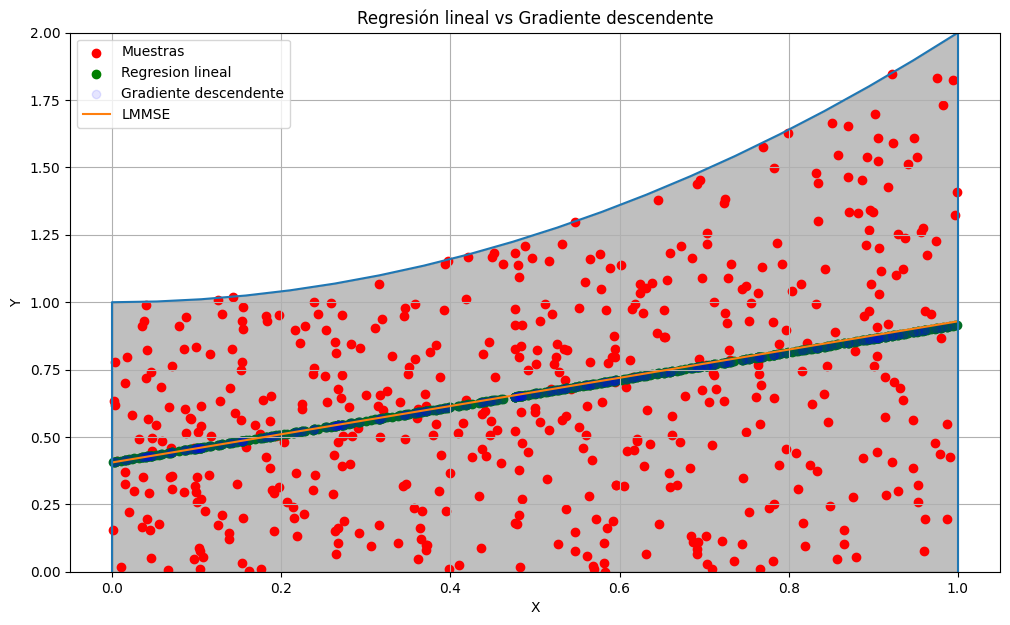

In [2264]:
plt.figure(figsize = (12, 7))
plt.plot(X, Y)
plt.fill_between(X, Y, color = 'gray', alpha = 0.5)
plt.grid(True)
plt.ylim(0, 2)
plt.scatter(muestrasX, muestrasY.T, color = 'red', label = 'Muestras')
plt.scatter(muestrasX, regresor.T, color = 'green', alpha = 1, label = 'Regresion lineal')
plt.scatter(muestrasX, regresor_gradiente.T, color = 'blue', alpha = 0.1, label = 'Gradiente descendente')
plt.plot(X, Ylmmse, label = 'LMMSE')
plt.legend();
plt.vlines(x = 0, ymin = 0, ymax = min(Y))
plt.vlines(x = 1, ymin = 0, ymax = max(Y))
plt.title('Regresión lineal vs Gradiente descendente')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()
